In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import keras
from keras.layers import Dense, GRU, Dropout, BatchNormalization
import numpy as np
import random
import tensorflow as tf

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [2]:
df=pd.read_csv("D:\IS403_TH\Dataset\GOOG.csv")
df1=df.reset_index()['Close']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-01,55.393501,55.506001,53.350052,53.476002,53.476002,50318000
1,2018-03-02,52.653999,54.099949,52.405750,53.945999,53.945999,45432000
2,2018-03-05,53.757000,54.855000,53.450001,54.546501,54.546501,24044000
3,2018-03-06,54.960999,55.092499,54.488750,54.752998,54.752998,30656000
4,2018-03-07,54.459499,55.611000,54.274101,55.481998,55.481998,25850000


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1569,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600
1570,2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
1571,2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15023800
1572,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000
1573,2024-05-31,173.399994,174.419998,170.970001,173.960007,173.960007,28085200


In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
# df1 = df1.values.reshape(-1,1)

In [5]:
# 4. Chia train test
train_size = int(0.7  * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [6]:
print(train_data.shape)
print(test_data.shape)

(1101, 1)
(473, 1)


In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1000, 100)
(1000,)
(372, 100)
(372,)


In [10]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1000, 100, 1)
(372, 100, 1)


In [12]:
# Construct model
model = Sequential()
model.add(GRU(64, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# show model architechture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

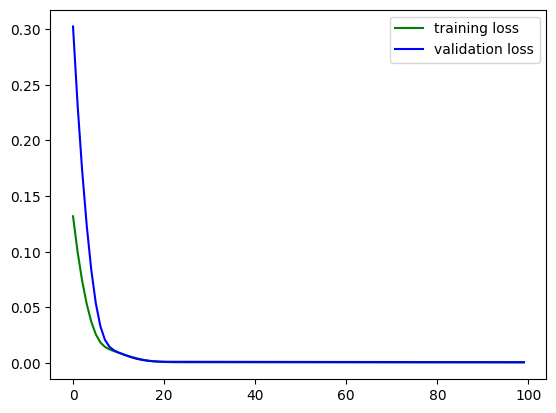

In [14]:
# 9. Fit mô hình với dữ liệu train, vẽ learning curve
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=0)

plt.plot(history.history['loss'], color = 'g', label = 'training loss')
plt.plot(history.history['val_loss'], color = 'b', label = 'validation loss')
plt.legend()
plt.show()

In [15]:
# 10. Dự báo dữ liệu test
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.astype(np.float64)
print(y_test_pred.shape)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
(372, 1)


In [16]:
print("NaN in y_test:", np.isnan(y_test).any())
print("NaN in y_test_pred:", np.isnan(y_test_pred).any())
print("Infinite in y_test:", np.isinf(y_test).any())
print("Infinite in y_test_pred:", np.isinf(y_test_pred).any())

NaN in y_test: False
NaN in y_test_pred: False
Infinite in y_test: False
Infinite in y_test_pred: False


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Giả sử y_test và y_test_pred đã được định nghĩa trước đó

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100
print('Testing MAPE(%):', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = mean_absolute_error(y_test, y_test_pred)
print('Testing MAE:', test_mae)


Testing RMSE: 0.02649268732630869
Testing MAPE(%): 3.6681378500334794
Testing MAE: 0.02011447650457774


In [18]:
# Inverse transform y_test and y_test_pred to their original scale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

# Evaluate the model with various metrics
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
print('Testing RMSE:', test_rmse)

test_mape = mean_absolute_percentage_error(y_test_inv, y_test_pred_inv) * 100
print('Testing MAPE(%):', test_mape)

test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
print('Testing MAE:', test_mae)

Testing RMSE: 3.4633623095395105
Testing MAPE(%): 2.1313973104857165
Testing MAE: 2.6295452380511324


In [19]:
# 12. Dự báo 90 ngày tiếp theo
# input đầu tiên là giá 100 ngày cuối trong test data
price_input = test_data[-time_step:, :]

total_model_out = []
# loop over first day to end day
for i in range(1,91):
    model_input = np.expand_dims(price_input, axis = 0)

    # check dimension of model input
    assert model_input.ndim == 3
    assert model_input.shape[1] == time_step

    # inference
    current_day_pred = model.predict(model_input, verbose=0)

    # shift tất cả phần tử từ về trái 1 vị trí (đầu về cuối)
    price_input = np.roll(price_input, shift = -1, axis = 0)
    price_input[-1] = current_day_pred

    # append vào list
    total_model_out.append(current_day_pred[0][0])

    # Kiểm tra index của giá vừa dự đoán đã được gán vào
    # phần tử cuối của price_input
    assert np.where(price_input == current_day_pred)[0] == 99


total_model_out = np.array(total_model_out).reshape(-1,1)
total_model_out.shape

(90, 1)

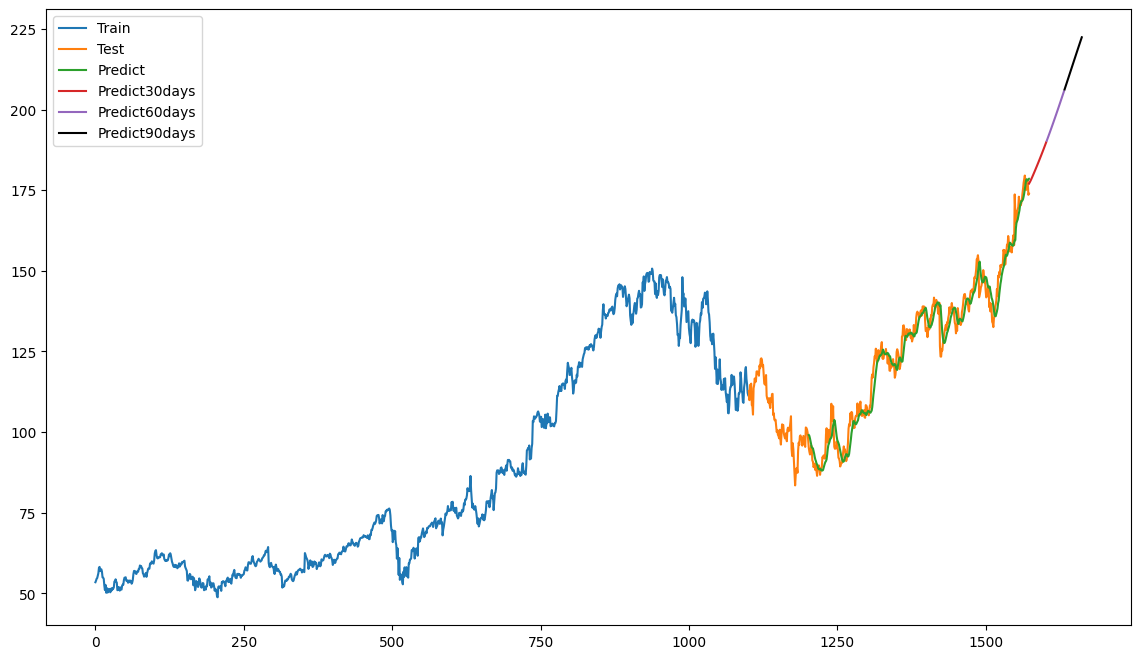

In [20]:
# 13. Vẽ hình
fig = plt.subplots(figsize = (14,8)) # set figure size

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), label = 'Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), label = 'Test')

test_data_index = pd.RangeIndex(start=train_size + time_step+1, stop=train_size + test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_test_pred), label = 'Predict')

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(total_model_out[0:30,:]),label = 'Predict30days') #marker = 'o'

prediect_data_index = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(total_model_out[30:60,:]),label = 'Predict60days') #marker = '+'

prediect_data_index = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(total_model_out[60:90,:]), label = 'Predict90days',color = 'black') #marker = 'x'
plt.legend()
plt.show()


